In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as mtp

In [2]:
url = 'eduData.csv'
df = pd.read_csv(url)
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,cns,dsa,oops,os
0,NaN,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,16.0,2,20
1,M,KW,NaN,lowerlevel,G-04,A,NaN,F,Father,20.0,20.0,3,25
2,M,KW,KuwaIT,NaN,G-04,A,IT,F,Father,10.0,7.0,0,30
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,25.0,5,35
4,NaN,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12,50
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42.0,30.0,13,70
6,M,KW,KuwaIT,MiddleSchool,G-07,A,NaN,F,Father,35.0,12.0,0,17
7,M,KW,NaN,MiddleSchool,G-07,A,Math,F,NaN,NaN,NaN,15,22
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12.0,21.0,16,50
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,NaN,80.0,25,70


In [5]:
print(df.isnull().sum())

gender          6
NationalITy     1
PlaceofBirth    5
StageID         2
GradeID         1
SectionID       0
Topic           4
Semester        0
Relation        2
cns             7
dsa             1
oops            0
os              0
dtype: int64


In [7]:
# drop the column with null value
t=df.dropna()
print(t.isnull().sum())

gender          0
NationalITy     0
PlaceofBirth    0
StageID         0
GradeID         0
SectionID       0
Topic           0
Semester        0
Relation        0
cns             0
dsa             0
oops            0
os              0
dtype: int64


In [9]:
df1 = pd.read_csv(url)
df1['cns'] = df1['cns'].replace(np.NAN,df['cns'].mean())
print(df1['cns'].isnull().sum())

0


In [10]:
df2 = pd.read_csv(url)
df2['cns'] = df2['cns'].interpolate(method='linear')
print(df2['cns'])

0      NaN
1     20.0
2     10.0
3     25.0
4     40.0
5     42.0
6     35.0
7     23.5
8     12.0
9     31.0
10    50.0
11    19.0
12     5.0
13    20.0
14    25.0
15    30.0
16    36.0
17    52.5
18    69.0
19    70.0
20    40.0
21    10.0
22    15.0
23     2.0
24     0.0
25     8.0
26    19.0
27    25.0
Name: cns, dtype: float64


In [11]:
df2['gender'] = df2['gender'].fillna('unknown')
print(df2['gender'])

0     unknown
1           M
2           M
3           M
4     unknown
5           F
6           M
7           M
8           F
9           F
10          M
11          M
12          M
13          M
14          F
15          F
16    unknown
17          M
18          F
19    unknown
20          F
21          F
22          M
23    unknown
24          M
25          M
26    unknown
27          M
Name: gender, dtype: object


In [22]:
import statistics
df3 = pd.read_csv(url)

df3["gender"] = df3["gender"].fillna(100)
cnt=0

for row in df3["gender"]:
    try:
        int(row)
        df.loc[cnt,"gender"] = np.nan
    except ValueError:
        pass
    cnt=cnt+1

print(df3["gender"])

0     100
1       M
2       M
3       M
4     100
5       F
6       M
7       M
8       F
9       F
10      M
11      M
12      M
13      M
14      F
15      F
16    100
17      M
18      F
19    100
20      F
21      F
22      M
23    100
24      M
25      M
26    100
27      M
Name: gender, dtype: object


In [23]:
df.skew(numeric_only=True)

cns     0.946321
dsa     1.241056
oops    0.440346
os      0.056839
dtype: float64

array([[<AxesSubplot:title={'center':'cns'}>,
        <AxesSubplot:title={'center':'dsa'}>],
       [<AxesSubplot:title={'center':'oops'}>,
        <AxesSubplot:title={'center':'os'}>]], dtype=object)

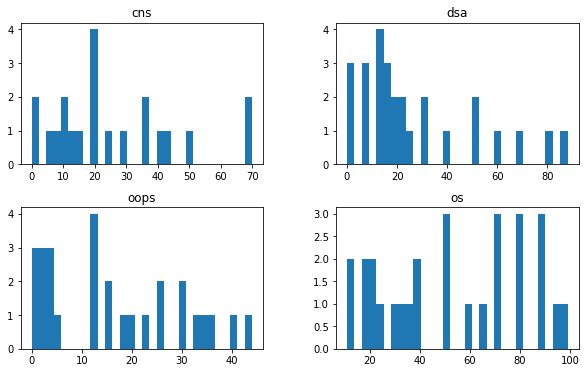

In [30]:
df.hist(grid=False,figsize=(10,6),bins=30)

In [ ]:
df3.insert(len(df3.columns),'dsa_sqrt',np.sqrt(df3.dsa))

In [37]:
df3.skew(numeric_only=True)

cns         0.946321
dsa         1.241056
oops        0.440346
os          0.056839
dsa_sqrt    0.291450
dtype: float64

<AxesSubplot:xlabel='os'>

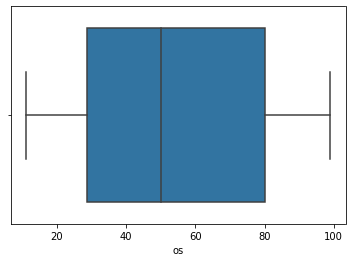

In [43]:
sea.boxplot(x=df3['os'])

In [46]:
print(np.where(df3['dsa']>65))
outliner = np.where(df3['dsa']>65)
df3.head(10)
df3.shape

(array([ 9, 10, 14], dtype=int32),)


(28, 14)

In [49]:
new_df = df3.drop(df3.index[outliner])

print(df3.shape)
print(new_df.shape)

(28, 14)
(25, 14)
